In [30]:
import pronouncing as pr
import random
from random import sample 
from collections import defaultdict
from collections import Counter
import numpy as np
import spacy
from simpleneighbors import SimpleNeighbors
import editdistance
from flat import document, shape, rgba
from IPython.display import Image, display
def show(page):
    display(Image(page.image(kind='rgba').png()))
from bezmerizing import smooth_point_path, fancy_curve
import numpy as np
from numpy.random import uniform, normal, choice
import tracery
from tracery.modifiers import base_english

## Make Flag

In [31]:
colors = [rgba(220, 0, 0, 255), # red
          rgba(170, 0, 0, 255), # dark red
          rgba(0, 0, 220, 255), # blue
          rgba(0, 0, 170, 255), # dark blue
          rgba(250, 250, 250, 255), # white
          rgba(255, 255, 0, 255), # yellow
          rgba(0, 150, 0, 255), # green
         ]
starcolors = [rgba(250, 250, 250, 255), # white
          rgba(255, 255, 0, 255), # yellow
             ]
              
horizontal = [1, 2, 2, 3, 3, 4, 5, 10, 13, 15, 20]
vertical = [1, 2, 2, 3, 3, 4, 5]
starnum = [0, 1, 1, 2, 3, 4, 5, 7, 10, 13, 15, 25, 50]

In [32]:
def makeFlag():
    h = 120
    w = 200
    d = document(w, h, 'mm') # create a document 100mm x 100mm (can replace 'mm' with 'pt')
    page = d.addpage() # add a page
    mycolors = sample(colors, 3)

    #add base
    figure = shape()
    figure.fill(mycolors[0])
    figure.stroke(rgba(255, 255, 255, 255))
    figure.width(0)
    rect = figure.rectangle(0, 0, w, h)
    page.place(rect)

    #add horizontal stripes
    mycolor = mycolors[1]
    stripes = random.choice(horizontal)
    sheight = h/stripes
    i = 0
    for stripe in range(stripes):
        figure = shape()
        figure.fill(mycolor)
        figure.stroke(rgba(255, 255, 255, 255))
        figure.width(0)
        rect = figure.rectangle(0, i*sheight*2, w, sheight)
        page.place(rect)
        i = i + 1

    #add vertical stripes
    mycolor = mycolors[2]
    stripes = random.choice(vertical)
    swidth = w/stripes
    i = 0
    for stripe in range(stripes):
        if (stripes == 2):
            myh = (random.randint(25, 100))
        else:
            myh = h
        figure = shape()
        figure.fill(mycolor)
        figure.stroke(rgba(255, 255, 255, 255))
        figure.width(0)
        rect = figure.rectangle(i*swidth*2, 0, swidth, myh)
        page.place(rect)
        i = i + 1

    #add stars
    mycolor = random.choice(starcolors)
    stars = random.choice(starnum)
    for _ in range(stars):
        figure = shape()
        figure.fill(mycolor)
        figure.stroke(rgba(255, 255, 255, 255))
        figure.width(0)
        x = random.randint(5, (w - 15))
        y = random.randint(5, (h - 15))
        cos = [
               4+x, 4+y,
               5+x, 0+y,
               6+x, 4+y,
               10+x, 4+y,
               7+x, 6+y,
               8+x, 10+y,
               5+x, 8+y,
               2+x, 10+y,
               3+x, 6+y,
               0+x, 4+y
                ]   
        star = figure.polygon(cos)
        page.place(star)


    show(page) # show the page

## Make Anthem

In [33]:
def markovModel(n, seq):
    model = {}
    for i in range (len(seq)-n):
        ngram = tuple(seq[i:i+n])
        nextItem = seq[i+n]
        if ngram not in model:
            model[ngram] = []
        model[ngram].append(nextItem)
    return model

In [34]:
def gen (n, model, start, end):
    output = list(start)
    for i in range(100):
        start = tuple(output[-n:])
        nextItem = random.choice(model[start])
        if nextItem == end:
            break
        else:
            output.append(nextItem)
    return output

In [35]:
nouns = open("plaintext/nouns.txt").read().split()
# includes all countires, and states/provinces of China, India, USA, Indonesia, Brazil
countries = open("plaintext/countries.txt").read()

In [36]:
nlp = spacy.load('en_core_web_md')

lookup = SimpleNeighbors(300)
for item in nlp.vocab:
    if item.has_vector and item.prob > -15 and item.is_lower:
        lookup.add_one(item.text, item.vector)
lookup.build()

def vec(s):
    return nlp.vocab[s].vector

In [96]:
def makePledge():
    starts = ['am','pa','an','be','gr','gu','in','mo','we','mi','no','ce','do','au','so', 'no', 'ea', 'ne', 'un']
    country = ""
    while (len(country) < 5):
        country = ''.join(gen(2, markovModel(2, countries), random.choice(starts), "\n"))

    #finds traits with relationship of liberty and justice
    traita = random.choice(nouns)
    lib_to_jus = vec("liberty") - vec("justice")
    traitb = lookup.nearest(lib_to_jus + vec(traita))[0]

    #goes to next item in search if traits are the same
    x = 1
    while (traita == traitb):
        traitb = lookup.nearest(lib_to_jus + vec(traita))[x]
        x = x + 1

    rules = {
        "output": " #intro.capitalize# \"#pledge#\" \n#outro#",
        "intro" : "The Pledge of Allegiance to the Flag: \n",
        "pledge" : "#1#\n #2#\n #3#\n #4#\n #5#\n #god##6#\n #7#",
        "1":["I pledge allegiance to the flag,","I pledge allegiance to my flag,"],
        "2":"of #country.capitalize#,",
        "country" : country,
        "3":"and to the #type#,",
        "type": ["republic","democracy","monarchy","federation","government"],
        "4" : "for which it stands,",
        "5":"one nation,",
        "god":["","","under God,\n ","under Gods,\n ","under Goddess,\n "],
        "6":"indivisible,",
        "7":"with #traita# and #traitb# for all.",
        "traita": traita,
        "traitb": traitb,
        "outro"  : " should be #said# by #action# facing #towards# #direction# with #parta# #over# #partb#.",
        "said" : ["said","recited","rendered"],
        "action" : ["sitting","standing","kneeling","bowing"],
        "towards" : ["toward","away from","opposite","90 degrees from",""],
        "direction" : ["the flag","the flag","the capital","the highest authority","the door"],
        "parta" : ["the #lr# hand","both hands", "the #lr# index finger"],
        "lr" : ["left", "right"],
        "over" : ["crossing", "over", "covering"],
        "partb" : ["heart","chest","head","#lr# eye","mouth","body","#lr# shoulder"]
    }

    grammar = tracery.Grammar(rules)
    grammar.add_modifiers(base_english)
    pledge = grammar.flatten("#pledge#")
    output = grammar.flatten("#output#")
    x = [output,pledge,country]
    return x


## Make Phoenetic

In [38]:
def divide(l):  
    output = []
    lengths = [3,4,5]
    x = random.choice(lengths)
    for i in range(0, len(l), x):  
        output.append(l[i:i + x])
    #print(output)
    return output

In [39]:
def phonit(text):
    
    text = text.split("\n")

    lines = []
    for line in text:
        line = line.strip()
        line = line.lower()
        if len(line) > 0:
            lines.append(line)

    ends = []
    for line in lines:
        ends.append(line[-1:])

    fullphon = []
    phonemes = []
    for line in lines:
        doc = nlp(line)
        for item in doc:
            phones = pr.phones_for_word(item.text)
            if len(phones) > 0:
                individual_phones = phones[0].split()
                add = []
                for item in individual_phones:
                    add.append(item)
                phonemes.extend(add)
        fullphon.append(phonemes)
        phonemes = []

    this = ""
    search = ""
    x = 0
    # ' '.join(part)
    for line in fullphon:
        parts = divide(line)
        for part in parts:
            target = part
            with_distances = [(word, phones, editdistance.eval(phones.split(), target)) for word, phones in pr.pronunciations]
            sorted_by_dist = sorted(with_distances, key=lambda x: x[2])
            lowest_dist = min([item[2] for item in with_distances])
            only_lowest = [item for item in sorted_by_dist if item[2] == lowest_dist]
            closest = random.choice(only_lowest)
        #print(closest)
            this = this + " " + closest[0]
        this = this + ends[x] + "\n"
        x = x + 1
    return(this)

## Output

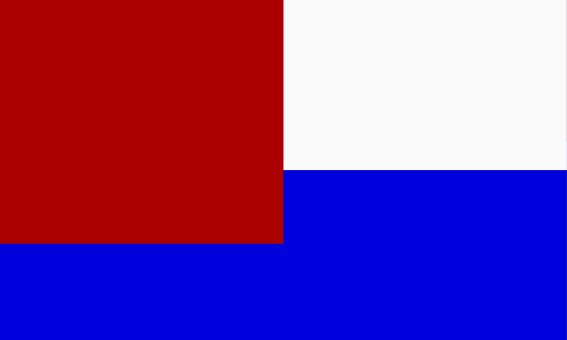

 The Pledge of Allegiance to the Flag: 
 "I pledge allegiance to my flag,
 of Ambon,
 and to the federation,
 for which it stands,
 one nation,
 under God,
 indivisible,
 with invasion and infiltration for all." 
 should be rendered by bowing facing away from the flag with both hands over mouth.


In [103]:
makeflag()
output = makePledge()
print(output[0])

In [104]:
for i in range (3):
    text = phonit(output[1])
    text = text.replace("of,","of " + output[2] + ",")
    print(text)

 pledge elisa stu flagg,
 of ambon,
 undue eidem ochra o,
 faure which it's tan does,
 wunsch ration,
 endive isetan ur,
 winn vaden undone fault patient kroll.

 aisle eka liege 'n toothed afoul ag,
 of ambon,
 and tomb adee mok ros e,
 faure wich its tan da,
 one's awan,
 indie visser belle,
 wishon evasion undone fultz ashen rawl.

 eyepiece july agence tuba flagg,
 of ambon,
 undue them ochra iie,
 forgey chits ands,
 one-way shane,
 earned ivey sib l,
 with now asia noun dayne fall trey schon four aul.

